In [0]:
# united 2 build working file 

# we will move the nice completed file to 'unit_2_production' when finished
#   this will allow me to fancy it up.  

In [0]:
#commented out to work with my own hosted csv on google docs as the source 
# %%capture
# import sys

# # If you're on Colab:
# if 'google.colab' in sys.modules:
#     DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
#     !pip install category_encoders==2.*
#     !pip install pandas-profiling==2.*

# # If you're working locally:
# else:
#     DATA_PATH = '../data/'

In [0]:
# import my main squeezeS
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

In [0]:
!pip install category_encoders==2.*
!pip install pandas-profiling==2.*

     |████████████████████████████████| 102kB 3.4MB/s 
     |████████████████████████████████| 194kB 4.7MB/s 
     |████████████████████████████████| 614kB 17.7MB/s 
     |████████████████████████████████| 1.5MB 21.1MB/s 
     |████████████████████████████████| 61kB 8.5MB/s 
     |████████████████████████████████| 61kB 8.6MB/s 
     |████████████████████████████████| 235kB 19.3MB/s 
     |████████████████████████████████| 307kB 37.5MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 215kB 46.8MB/s 
     |████████████████████████████████| 61kB 9.1MB/s 
     |████████████████████████████████| 747kB 41.6MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.5.0-py2.py3-none-any.whl size=241329 sha256=e3fb1fe4c72b29ed866ab39c450ce557bfafb4d08bd1cf38c2bc10101b99d82a
  Stored in directory: /root/.cache/pip/wheels/9b/c9/f1/4a2f30c760e017f3e2f46be999c4597a93d126ef5ea38e276f
  Created wheel for confuse: filename=confuse-1.0.0-cp36

In [0]:
# import the dataset - lets establish some baselines 
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR6LzWx6lS1FOS0Fl2QFF1CJeNrhsH0MxLmqEp8vbYj0Z-zDRm5Xwu4PQkP9WbCSokITS4UwcF9hCQ3/pub?output=csv')


In [0]:
# for dealing with all the ugly column names. 
df.columns = (
    df.columns
    .str.replace(' - ', '_')
    .str.replace('/', '_')
    .str.replace(',', '_')
    .str.replace('.', '_')
    .str.replace('(', '_')
    .str.replace(')', '_')
    .str.replace(' ', '_')
    .str.replace('__', '_')
    .str.lower()
)

In [0]:
print(df.shape)
df.head()

(576, 21)


,city,country,cost_of_living_index,rent_index,cost_of_living_plus_rent,groceries_index,restaurant_price_index,local_purchasing_power_index,milk_regular_1_liter_,monthly_pass,apartment_city_center_1bed,internet_monthly,cappuccino_regular_,water_0_33_liter_bottle_,eggs_12_,water_1_5_liter_bottle_,domestic_beer_0_5_liter_bottle_,transit_ticket,apartment_utilities,movie_ticket,apples_1kg_
0,Aachen,Germany,62.14,22.30,43.38,52.39,56.62,153.14,0.71,55.80,509.62,29.33,2.55,1.67,1.38,0.66,1.00,2.93,169.11,8.93,2.05
1,Aalborg,Denmark,81.71,23.53,54.31,63.84,95.81,118.42,0.94,57.64,618.33,30.70,4.16,2.05,3.35,1.43,2.05,3.30,176.80,14.99,2.29
2,Aberdeen,United Kingdom,82.12,33.49,59.22,62.94,97.71,124.41,1.30,78.64,871.27,29.95,3.58,1.18,2.76,1.83,2.15,3.41,307.68,13.11,2.79
3,Abu Dhabi,United Arab Emirates,62.74,69.91,66.12,53.59,61.65,134.74,1.76,21.78,1868.95,87.22,4.57,0.32,2.69,0.65,2.42,0.54,78.84,9.53,2.35
4,Accra,Ghana,64.16,46.19,55.70,59.38,49.11,15.31,2.39,200.00,1041.59,57.78,2.52,1.05,2.41,0.72,1.95,0.84,64.59,7.33,2.88


In [0]:
# Count the mssing values
df.isna().sum().sort_values()

city                                0
apartment_utilities                 0
transit_ticket                      0
water_1_5_liter_bottle_             0
eggs_12_                            0
water_0_33_liter_bottle_            0
cappuccino_regular_                 0
internet_monthly                    0
movie_ticket                        0
apartment_city_center_1bed          0
milk_regular_1_liter_               0
local_purchasing_power_index        0
restaurant_price_index              0
groceries_index                     0
cost_of_living_plus_rent            0
rent_index                          0
cost_of_living_index                0
country                             0
monthly_pass                        0
apples_1kg_                         0
domestic_beer_0_5_liter_bottle_    13
dtype: int64

In [0]:
df.dtypes

city                                object
country                             object
cost_of_living_index               float64
rent_index                         float64
cost_of_living_plus_rent           float64
groceries_index                    float64
restaurant_price_index             float64
local_purchasing_power_index       float64
milk_regular_1_liter_              float64
monthly_pass                       float64
apartment_city_center_1bed         float64
internet_monthly                   float64
cappuccino_regular_                float64
water_0_33_liter_bottle_           float64
eggs_12_                           float64
water_1_5_liter_bottle_            float64
domestic_beer_0_5_liter_bottle_    float64
transit_ticket                     float64
apartment_utilities                float64
movie_ticket                       float64
apples_1kg_                        float64
dtype: object

In [0]:
# Pandas Profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(df, minimal=True).to_notebook_iframe()

profile

# Baseline Accuracy

In [0]:
df['cost_of_living_index'].describe()

count    576.000000
mean      61.625069
std       21.551263
min       19.550000
25%       42.472500
50%       66.850000
75%       75.617500
max      136.660000
Name: cost_of_living_index, dtype: float64

In [0]:
#This is the cost of living mae for the entire dataset together 
guess = df['cost_of_living_index'].mean()
error = guess - df['cost_of_living_index']
mean_absolute_error = error.abs().mean()
# repeat it back in a clearer format 
print(f'Guessed : {guess:,.2f} for every city ')
print(f'Our cost of living index would be off by {mean_absolute_error:,.2f} on average.')

Guessed : 61.63 for every city 
Our cost of living index would be off by 17.86 on average.


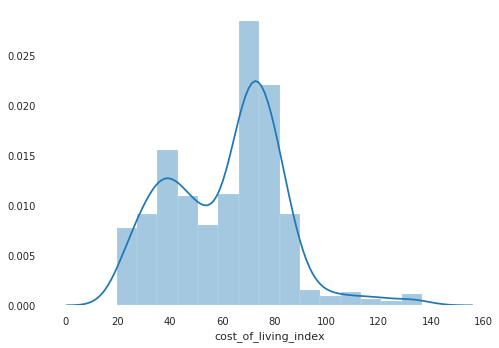

In [0]:
# The distribution is right-skewed double humped
sns.distplot(df['cost_of_living_index']);

# Train Test Split

In [0]:
# from sklearn.model_selection import train_test_split I ended up not using this


"""
The following is an example of what the sklearn approach would be
# train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
#                  pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
# test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')

# # Split train into train & val
# train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
#                               stratify=train['status_group'], random_state=42)

# sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')


# train.shape, val.shape, test.shape

"""

# split is the np function that train test split uses and split function 
# is easier for me to understand 


"\nThe following is an example of what the sklearn approach would be\n# train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), \n#                  pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))\n# test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')\n\n# # Split train into train & val\n# train, val = train_test_split(train, train_size=0.80, test_size=0.20, \n#                               stratify=train['status_group'], random_state=42)\n\n# sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')\n\n\n# train.shape, val.shape, test.shape\n\n"

In [0]:
# make a train test val split 
# 80% 10% 10%
train, val, test = np.split(df.sample(frac=1, random_state=42), [int(.8*len(df)), int(.9*len(df))])

In [0]:
print(train.shape)
print(val.shape)
print(test.shape)

(460, 21)
(58, 21)
(58, 21)


In [0]:
#This is the cost of living mae for the train dataset alone now
train_guess = train['cost_of_living_index'].mean()
train_error = train_guess - train['cost_of_living_index']
train_mean_absolute_error = train_error.abs().mean()
# repeat it back in a clearer format 
print(f'*Training Set* Guessed : {train_guess:,.2f} for every city ')
print(f'Our cost of living index would be off by {train_mean_absolute_error:,.2f} on average. *Training Set*')

*Training Set* Guessed : 61.68 for every city 
Our cost of living index would be off by 18.40 on average. *Training Set*


# Wrangle Function and Feature engineering

In [0]:
df.columns

Index(['city', 'country', 'cost_of_living_index', 'rent_index',
       'cost_of_living_plus_rent', 'groceries_index', 'restaurant_price_index',
       'local_purchasing_power_index', 'milk_regular_1_liter_', 'monthly_pass',
       'apartment_city_center_1bed', 'internet_monthly', 'cappuccino_regular_',
       'water_0_33_liter_bottle_', 'eggs_12_', 'water_1_5_liter_bottle_',
       'domestic_beer_0_5_liter_bottle_', 'transit_ticket',
       'apartment_utilities', 'movie_ticket', 'apples_1kg_'],
      dtype='object')

In [0]:
train['domestic_beer_0_5_liter_bottle_'].describe()

count    449.000000
mean       1.637639
std        0.859355
min        0.440000
25%        1.000000
50%        1.490000
75%        2.010000
max        7.230000
Name: domestic_beer_0_5_liter_bottle_, dtype: float64

In [0]:
def clean(X):

    # Prevent SettingWithCopyWarning
    X = X.copy()

    X = X.drop(columns='cost_of_living_plus_rent')
    # drop the column that will leak data into the model 
    # drop

    # # convert pd_to datetime 
    # X['inspection_date'] = pd.to_datetime(X['inspection_date'], infer_datetime_format=True)

    # # drop columns masking
    # drop_cols = ['dba_name', 'aka_name', 'address', 'state', 'location']
    # X = X.drop(columns=drop_cols)

    # # deal with them zeroes and nannies 
    # # also assign a columne for missing values incase of significance 
    # cols_with_zeros = ['longitude', 'latitude', 'zip', 'city', 'violations']
    # for col in cols_with_zeros:
    #     X[col] = X[col].replace(0, np.nan)
    #     X[col+'_MISSING'] = X[col].isnull()

    # domestic_beer_0_5_liter_bottle_
    # X['domestic_beer_0_5_liter_bottle_'] = X['domestic_beer_0_5_liter_bottle_'].replace(0, np.nan)
    # Replacing with nan breaks my linear regression model 

    # fill column with the mean price 
    # or I could impute mean
    # mean_beer = X[X['domestic_beer_0_5_liter_bottle_']>0]['domestic_beer_0_5_liter_bottle_'].mean()
    # X.loc[X['domestic_beer_0_5_liter_bottle_']==0, 'domestic_beer_0_5_liter_bottle_'] = int(mean_beer)

    X.fillna(X.mean(), inplace=True)
    #or alternatively X = X.fillna(X.mean())

    # mean_license = X[X['license_#']>0]['license_#'].mean()
    # X.loc[X['license_#']==0, 'license_#'] = int(mean_license)

    # # reduce cardinality for inspection type 
    # # Get a list of the top 10 'inspection_type'
    # top10_insp_type = X['inspection_type'].value_counts()[:10].index

    # # At locations where the 'inspection_type' is NOT in the top 10, 
    # # replace the 'inspection_type' with 'Other'
    # X.loc[~X['inspection_type'].isin(top10_insp_type), 'inspection_type'] = 'Other'  

    # # reduce cardinality for facility_type
    # # Get a list of the top 10 'facility_type'
    # top10_fac_type = X['facility_type'].value_counts()[:10].index

    # # At locations where the 'facility_type' is NOT in the top 10, 
    # # replace the 'facility_type' with 'Other'
    # X.loc[~X['facility_type'].isin(top10_fac_type), 'facility_type'] = 'Other'  

    # # make a column about violation string length - longer is badder
    # X['violations_length'] = X['violations'].str.len()    
    
    # # return cleaned df
    return X

train = clean(train)
val = clean(val)
test = clean(test)  

In [0]:
# mean_beer = X[X['domestic_beer_0_5_liter_bottle_']>0]['domestic_beer_0_5_liter_bottle_'].mean()
#     X.loc[X['domestic_beer_0_5_liter_bottle_']==0, 'domestic_beer_0_5_liter_bottle_'] = int(mean_beer)


train['domestic_beer_0_5_liter_bottle_'].describe()

count    460.000000
mean       1.637639
std        0.848995
min        0.440000
25%        1.000000
50%        1.500000
75%        2.000000
max        7.230000
Name: domestic_beer_0_5_liter_bottle_, dtype: float64

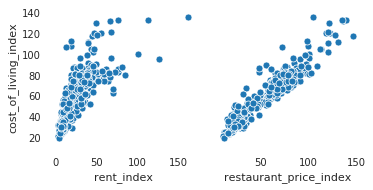

In [0]:
# Seaborn pairplot to show relationship of the data to my variables

# pp = sns.pairplot(data=data,
#                   y_vars=['age'],
#                   x_vars=['weight', 'height', 'happiness'])

# cost_of_living_plus_rent restaurant_price_index

# apartment_city_center_1bed apartment_utilities internet_monthly groceries_index

pairplot = sns.pairplot(data=train,
                        y_vars=['cost_of_living_index'],
                        x_vars= ['rent_index', 'restaurant_price_index'])

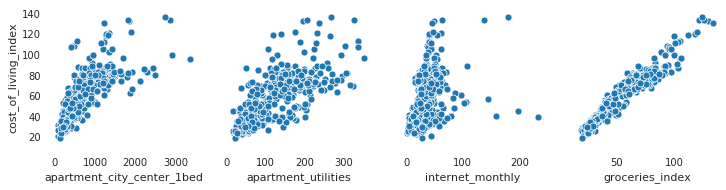

In [0]:
pairplot = sns.pairplot(data=train,
                        y_vars=['cost_of_living_index'],
                        x_vars= ['apartment_city_center_1bed', 'apartment_utilities', 'internet_monthly', 'groceries_index'])

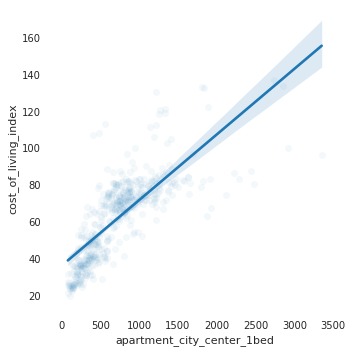

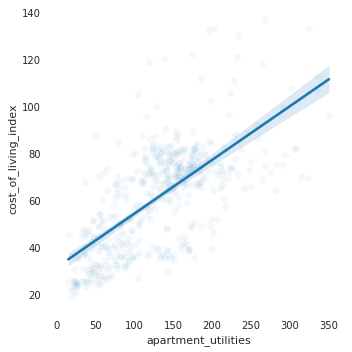

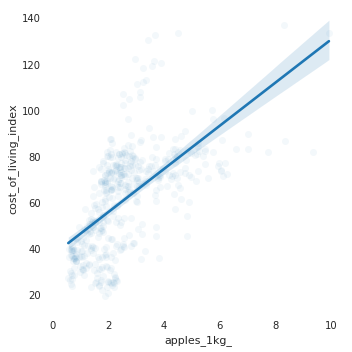

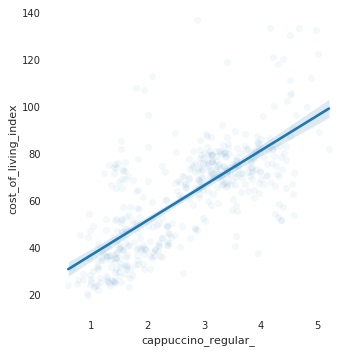

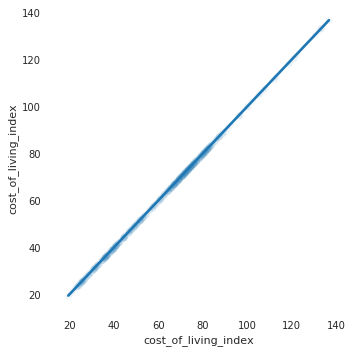

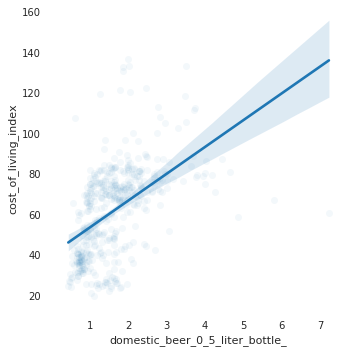

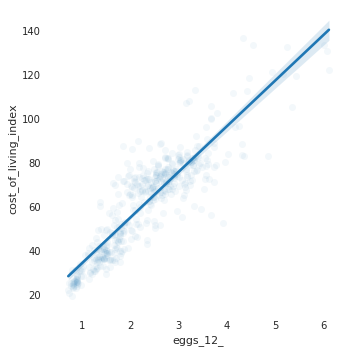

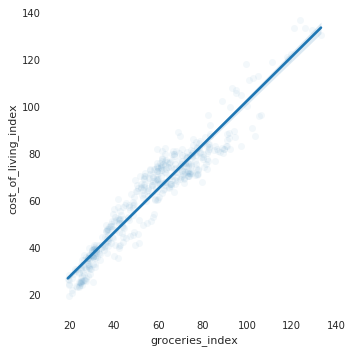

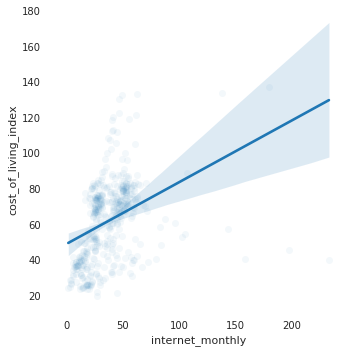

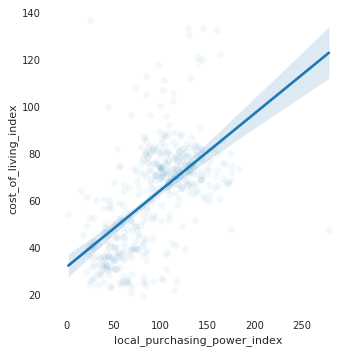

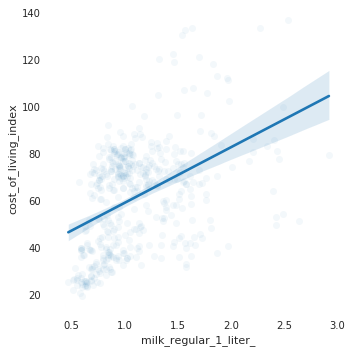

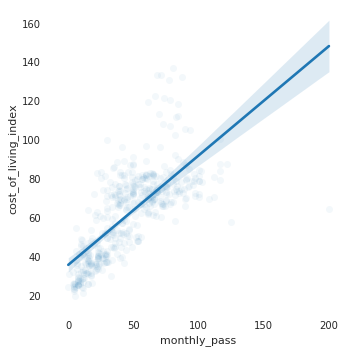

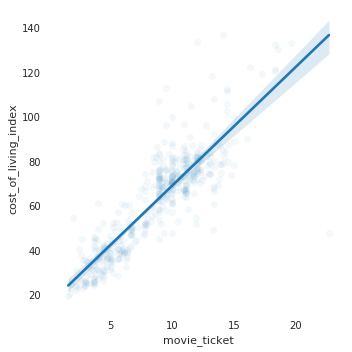

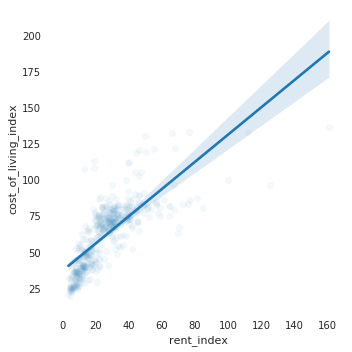

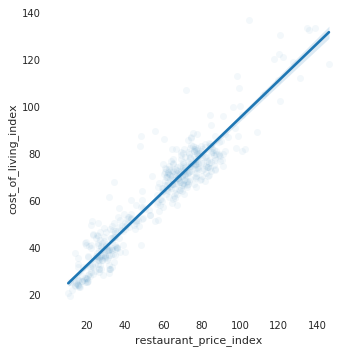

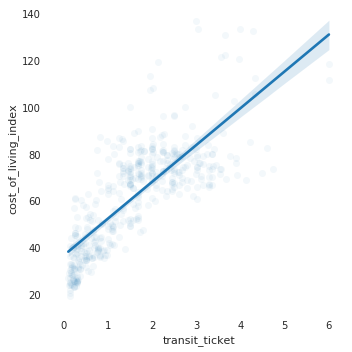

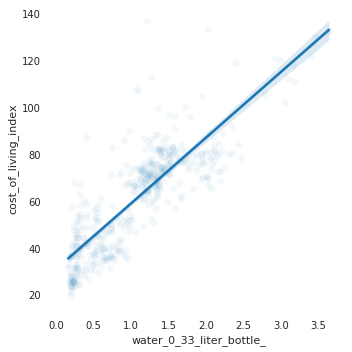

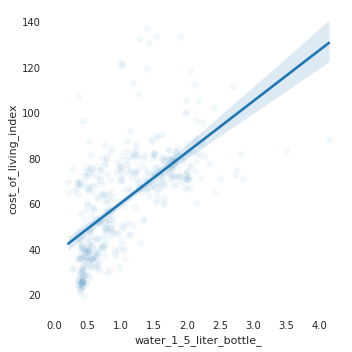

In [0]:
numeric = train.select_dtypes('number')
for col in sorted(numeric.columns):
    sns.lmplot(x=col, y='cost_of_living_index', data=train, scatter_kws=dict(alpha=0.65))
    plt.show()

# !!! Save Space for doing Cross Validation here !!!

In [0]:
# put my cross validation code here

# Target / Features X train - y feature matrix

In [0]:
# The COL Index is the target
target = 'cost_of_living_index'

# Get a dataframe with all train columns except the target
train_features = train.drop(columns=[target])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 60
# increased to 60 for this exercise 
categorical_features = cardinality[cardinality <= 60].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features

In [0]:
# Arrange data into X features matrix and y target vector 

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

In [0]:
print(X_train.shape)
X_train.head()

(460, 17)


,rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index,milk_regular_1_liter_,monthly_pass,apartment_city_center_1bed,internet_monthly,cappuccino_regular_,water_0_33_liter_bottle_,eggs_12_,water_1_5_liter_bottle_,domestic_beer_0_5_liter_bottle_,transit_ticket,apartment_utilities,movie_ticket,apples_1kg_
234,5.85,24.37,14.33,85.16,0.65,11.18,143.83,11.90,1.33,0.21,0.81,0.43,1.21,0.24,23.99,2.24,1.95
118,56.68,82.67,84.15,128.59,0.84,100.00,1627.97,49.71,3.97,1.66,2.86,1.71,1.37,2.25,125.47,12.00,3.72
346,23.77,72.05,65.07,86.73,0.89,50.22,668.33,29.17,2.85,1.51,2.90,1.00,2.42,1.67,150.20,8.93,2.98
498,4.42,19.80,15.93,32.56,0.55,0.00,147.97,1.49,0.60,0.31,0.83,0.42,0.50,0.11,55.52,2.50,0.69
402,9.53,50.78,23.44,77.63,1.71,19.69,250.71,40.29,2.38,0.29,1.30,0.56,2.12,0.49,39.94,3.69,2.76


# Working pipe here - This is using all the features

In [0]:
X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

In [0]:
import warnings
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [0]:
warnings.filterwarnings('ignore')

In [0]:
#instantiate scaler to standardize values 
# apply to train test val 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [0]:
type(X_train_scaled)

In [0]:
# X_train_scaled_df = pd.DataFrame(X_train_scaled)
# X_train_scaled_df
# sns.distplot(X_train_scaled_df['cost_of_living_index'])

In [0]:
# X_test_scaled_df = pd.DataFrame(X_test_scaled)
# X_test_scaled_df
# sns.distplot(X_test_scaled_df['cost_of_living_index']);

In [0]:
# loop through all the options of k best from 1 to size of length of columns
for k in range(1, len(X_train.columns)+1):
    print(f'{k} features')
    
    #instantiate selector
    selector = SelectKBest(score_func=f_regression, k=k)
    #Fit train set
    X_train_selected = selector.fit_transform(X_train_scaled, y_train)
    # apply fit to the validation and test 
    X_val_selected = selector.transform(X_val_scaled)
    X_test_selected = selector.transform(X_test_scaled)
    
    #instantiate the model / fit the model 
    model = LinearRegression()
    model.fit(X_train_selected, y_train)
    
    # apply the model to the validation set 
    y_pred = model.predict(X_val_selected)
    mae = mean_absolute_error(y_val, y_pred)
    print(f'MAE:  versus my validation set  {mae:,.4f} \n')

1 features
MAE:  versus my validation set5.6619 

2 features
MAE:  versus my validation set2.7563 

3 features
MAE:  versus my validation set2.7240 

4 features
MAE:  versus my validation set2.6075 

5 features
MAE:  versus my validation set2.6451 

6 features
MAE:  versus my validation set2.6119 

7 features
MAE:  versus my validation set2.6989 

8 features
MAE:  versus my validation set2.7115 

9 features
MAE:  versus my validation set2.4921 

10 features
MAE:  versus my validation set2.3937 

11 features
MAE:  versus my validation set1.9763 

12 features
MAE:  versus my validation set1.8328 

13 features
MAE:  versus my validation set1.7739 

14 features
MAE:  versus my validation set1.6633 

15 features
MAE:  versus my validation set1.6388 

16 features
MAE:  versus my validation set1.5293 

17 features
MAE:  versus my validation set1.4655 



# !!!!!  Which features made what difference   !!!!!

1.   ?
2.   ?



# DO the XGBoost here now

# New comprehensive regression approach

In [0]:
X_train

In [0]:
X_test

In [0]:
import numpy as np
from sklearn import linear_model
from sklearn import svm

# classifiers = [
#     svm.SVR(),
#     linear_model.SGDRegressor(),
#     linear_model.BayesianRidge(),
#     linear_model.LassoLars(),
#     linear_model.ARDRegression(),
#     linear_model.PassiveAggressiveRegressor(),
#     linear_model.TheilSenRegressor(),
#     linear_model.LinearRegression()]

# trainingData    = np.array([ [2.3, 4.3, 2.5],  [1.3, 5.2, 5.2],  [3.3, 2.9, 0.8],  [3.1, 4.3, 4.0]  ])
# trainingScores  = np.array( [3.4, 7.5, 4.5, 1.6] )
# predictionData  = np.array([ [2.5, 2.4, 2.7],  [2.7, 3.2, 1.2] ])

# for item in classifiers:
#     print(item)
#     clf = item
#     clf.fit(trainingData, trainingScores)
#     print(clf.predict(predictionData),'\n')

In [0]:
classifiers = [
#     svm.SVR(),
#     linear_model.SGDRegressor(),
     linear_model.BayesianRidge(),
#     linear_model.LassoLars(),
#     linear_model.ARDRegression(),
#     linear_model.PassiveAggressiveRegressor(),
#     linear_model.TheilSenRegressor(),
     linear_model.LinearRegression()]

# trainingData    = np.array([ [2.3, 4.3, 2.5],  [1.3, 5.2, 5.2],  [3.3, 2.9, 0.8],  [3.1, 4.3, 4.0]  ])
# trainingScores  = np.array( [3.4, 7.5, 4.5, 1.6] )
# predictionData  = np.array([ [2.5, 2.4, 2.7],  [2.7, 3.2, 1.2] ])

trainingData = X_train_scaled
trainingScores = y_train
predictionData = X_test_scaled

for item in classifiers:
    print(item, '-Classifer \n')
    clf = item
    clf.fit(trainingData, trainingScores)
    print(clf.predict(predictionData),'\n')

    

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False) -Classifer 

[42.58390568 65.66647027 40.14131893 80.27901853 63.09288254 65.20020462
 71.22655636 69.30155618 63.44589023 29.91478729 70.9645689  74.92450043
 87.83252656 34.20626055 58.75157418 46.65146496 82.55650824 22.20764001
 44.35333995 45.46211654 72.12781332 34.33801995 36.46811675 79.31599733
 82.79972482 82.69673182 38.03518339 85.05371418 51.01730845 90.79849946
 68.92703051 70.03294107 42.85435514 66.86277006 67.2517183  58.6404278
 41.94829387 69.82252969 75.91260181 34.64267458 52.20654006 66.96443054
 46.95961197 68.54734034 77.26798805 70.92986134 39.37338047 67.11680088
 80.76060962 26.62164205 43.36743275 67.97353595 95.35609995 65.92457692
 36.27573531 23.91659327 36.34910614 37.52444635] 

LinearRegression(

In [0]:
classifiers = [
#     svm.SVR(),
#     linear_model.SGDRegressor(),
     linear_model.BayesianRidge(),
#     linear_model.LassoLars(),
#     linear_model.ARDRegression(),
#     linear_model.PassiveAggressiveRegressor(),
#     linear_model.TheilSenRegressor(),
     linear_model.LinearRegression()]

# trainingData    = np.array([ [2.3, 4.3, 2.5],  [1.3, 5.2, 5.2],  [3.3, 2.9, 0.8],  [3.1, 4.3, 4.0]  ])
# trainingScores  = np.array( [3.4, 7.5, 4.5, 1.6] )
# predictionData  = np.array([ [2.5, 2.4, 2.7],  [2.7, 3.2, 1.2] ])

trainingData = X_train_scaled
trainingScores = y_train
predictionData = X_val_scaled

for item in classifiers:
    print(item, '-Classifer \n')
    clf = item
    clf.fit(trainingData, trainingScores)
    print(clf.predict(predictionData),'\n')


    y_pred = clf.predict(predictionData)
    mae = mean_absolute_error(y_val, y_pred) #was y-Pred
    print(f'MAE:  versus my validation set {mae:,.4f} \n')

   

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False) -Classifer 

[23.98284097 82.81849419 70.09720509 75.1537014  38.63186215 60.82387191
 65.88858955 75.56135507 47.12933243 86.25486017 61.50103928 77.00796619
 44.65700248 90.26053498 73.70811275 80.22943072 81.8561363  70.17747891
 34.99364927 66.95176343 24.3733433  50.27903917 54.15310322 69.6354997
 96.71526578 26.11585175 48.87692901 35.3772452  69.31396352 84.91923824
 35.91221124 73.05468749 51.0369711  71.66827584 80.48888563 66.20388275
 75.51365677 77.79583604 48.64650149 33.69542735 60.51083467 74.17251994
 72.97038105 73.52657771 71.32319927 70.45375173 70.791909   27.49895877
 72.13609498 42.91291861 82.73701007 78.58282132 73.61733762 64.1331346
 71.43187066 75.37587946 67.40265225 44.95104093] 

MAE:  versus my va

# Now do this with all the regressors. 


In [0]:
classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),    
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]



trainingData = X_train_scaled
trainingScores = y_train
predictionData = X_val_scaled

for item in classifiers:
    print(item, '-Classifer \n')
    clf = item
    clf.fit(trainingData, trainingScores)
    print(clf.predict(predictionData),'\n')


    y_pred = clf.predict(predictionData)
    mae = mean_absolute_error(y_val, y_pred) #was y-Pred
    print(f'MAE:  versus my validation set {mae:,.4f} \n')

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) -Classifer 

[29.2631586  79.97566245 68.60468816 76.81966226 36.64275946 64.69738501
 67.5825934  75.88825624 51.13831745 73.98266942 64.48719604 68.56560271
 45.52269614 77.6155114  74.73554725 76.59612864 76.09053093 70.17913245
 33.63247446 67.81537641 29.77271639 52.66297733 53.85542018 70.90836284
 68.23514333 30.0554546  50.56143145 35.56209511 72.22757297 70.4081597
 34.76881258 71.79347067 49.28379626 69.41219973 72.07015001 72.52383997
 73.15898402 72.84631735 46.77283056 33.81860511 62.42056359 75.42594098
 73.67064813 72.75491352 73.0118141  69.00909822 70.93226597 33.47260793
 74.15236913 47.07418157 80.78447851 78.66973785 74.76885969 62.89534655
 69.70923352 73.95697825 65.74716716 42.47826648] 

MAE:  versus my validation set3.4809 

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             e

# Now all regressors with visuals


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) -Classifer 

[29.2631586  79.97566245 68.60468816 76.81966226 36.64275946 64.69738501
 67.5825934  75.88825624 51.13831745 73.98266942 64.48719604 68.56560271
 45.52269614 77.6155114  74.73554725 76.59612864 76.09053093 70.17913245
 33.63247446 67.81537641 29.77271639 52.66297733 53.85542018 70.90836284
 68.23514333 30.0554546  50.56143145 35.56209511 72.22757297 70.4081597
 34.76881258 71.79347067 49.28379626 69.41219973 72.07015001 72.52383997
 73.15898402 72.84631735 46.77283056 33.81860511 62.42056359 75.42594098
 73.67064813 72.75491352 73.0118141  69.00909822 70.93226597 33.47260793
 74.15236913 47.07418157 80.78447851 78.66973785 74.76885969 62.89534655
 69.70923352 73.95697825 65.74716716 42.47826648] 

MAE:  versus my validation set3.4809 

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             e

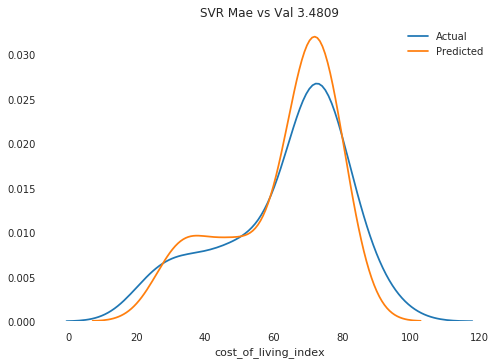

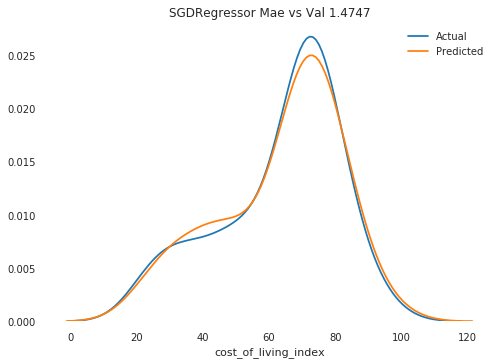

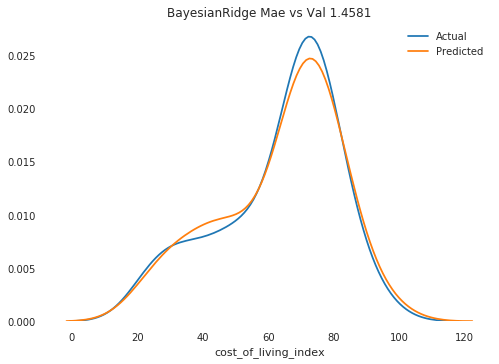

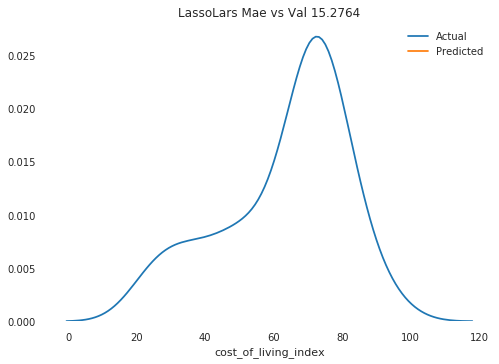

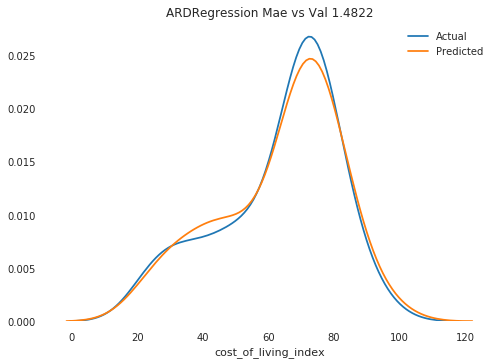

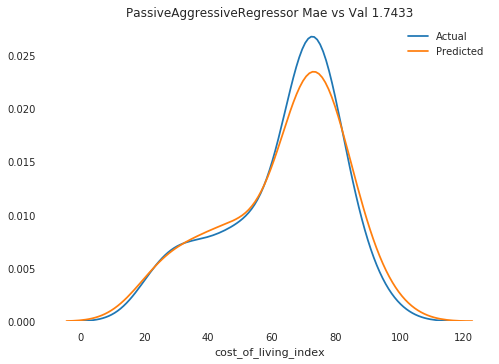

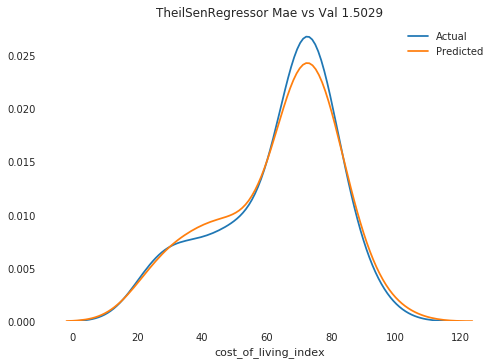

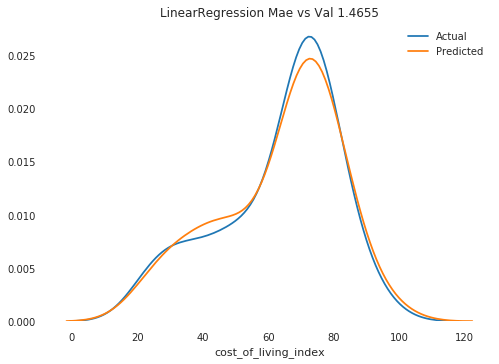

In [0]:
classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),    
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]



trainingData = X_train_scaled
trainingScores = y_train
predictionData = X_val_scaled

for item in classifiers:
    print(item, '-Classifer \n')
    
    clf = item
    clf.fit(trainingData, trainingScores)
    print(clf.predict(predictionData),'\n')


    y_pred = clf.predict(predictionData)
    mae = mean_absolute_error(y_val, y_pred) #was y-Pred
    print(f'MAE:  versus my validation set{mae:,.4f} \n')

    # sns.regplot(x="total_bill", y="tip", data=tips);
    fig, ax = plt.subplots()
    sns.distplot(y_val, hist=False, kde=True, ax=ax, label='Actual')
    sns.distplot(y_pred, hist=False, kde=True, ax=ax, label='Predicted')

    title_string = str(item)
    mae_round = round(mae,4)
    mae_string = str(mae_round)
    sep = '('
    title_string = title_string.split(sep, 1)[0]
    title_acc = str(title_string + " Mae vs Val " + mae_string)
    ax.set_title(title_acc)
    # ax.legend().set_visible(False)

# Now everything
## all titles cleaned up
## label added to graph about what MAE accuracy metric was. 

In [0]:
y_pred

array([23.96842561, 82.81206469, 70.15472276, 75.1181396 , 38.64901242,
       60.70012558, 65.86281275, 75.52730509, 47.1515991 , 86.28154562,
       61.46984495, 76.94904859, 44.63569875, 90.3234083 , 73.64213253,
       80.27852466, 81.87605451, 70.23833588, 34.99265239, 66.94835762,
       24.36537544, 50.25294551, 54.15687215, 69.66613933, 96.75722311,
       26.10815793, 48.84125187, 35.39063015, 69.25618128, 84.87489076,
       35.96701102, 73.06502341, 51.06344895, 71.72363135, 80.48883347,
       66.08902199, 75.49547951, 77.83946061, 48.66135596, 33.7070724 ,
       60.41764997, 74.17959427, 72.99891271, 73.53181181, 71.32542756,
       70.44881876, 70.80230055, 27.50960617, 72.10052896, 42.91844881,
       82.73949269, 78.52225736, 73.63089638, 64.16352868, 71.47682761,
       75.33636863, 67.32468336, 44.95551961])

In [0]:
print('train', X_train_scaled.shape)
print('test',X_test_scaled.shape)
print('val',X_val_scaled.shape)
y_train.shape

train (460, 17)
test (58, 17)
val (58, 17)


(460,)

# !!!  All Pipe below here broken !!!

# Linear Regression Model

In [0]:
# after a baseline can I make a linear regression model that beats guessing. 

In [0]:
#1 import estimator from scikit lear 
from sklearn.linear_model import LinearRegression

In [0]:
#2 instantiate the class
model = LinearRegression()

In [0]:
#3 X feature Y target matrix
# this is being done for just 1 feature and 1 target with no split so far 

# X feature y Target split was done above. 

In [0]:
train.isnull().sum()

In [0]:
#4fit the model
model.fit(X_train, y_train)

In [0]:
#5apply model to new data 
y_pred = model.predict(X_test)

# Sprint Challenge 7 approach

This is currently broken because I have floats trying to describe a float instead of a categorical 

article here explains and it gave me an idea 
https://stackoverflow.com/questions/41925157/logisticregression-unknown-label-type-continuous-using-sklearn-in-python



In [0]:
Stop here 

In [0]:
# imports for the next couple steps. Look for more along the way 
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [0]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(random_state=0, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

# RF REGRESSOR Pipeline

In [0]:
pipeline = make_pipeline(
    ce.TargetEncoder(), 
    SimpleImputer(), 
    RandomForestRegressor(random_state=42)
)

param_distributions = {
    'targetencoder__min_samples_leaf': randint(1, 1000), 
    
#     Remove this hyperparameter, because of an issue: 
#     https://github.com/scikit-learn-contrib/categorical-encoding/issues/184
#     'targetencoder__smoothing': uniform(1, 1000), 
    
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [5, 10, 15, 20, None], 
    'randomforestregressor__max_features': uniform(0, 1), 
}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=15, 
    cv=5, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);

In [0]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)

# Ryan Herr example Project 2 

In [0]:
# this was the interest rate pickled. 

import category_encoders as ce
from joblib import dump, load
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor

# history = pd.read_csv('LoanStats_securev1_2019Q1.csv.zip', engine='python', skiprows=1, skipfooter=2)

# condition = (history.grade.isin(['A','B','C','D'])) & (history.term==' 36 months')
# history = history[condition]

# history['Interest Rate'] = history['int_rate'].str.strip('%').astype(float)

# history = history.rename(columns=                     
    # {'annual_inc': 'Annual Income', 
    #  'fico_range_high': 'Credit Score', 
    #  'funded_amnt': 'Loan Amount', 
    #  'title': 'Loan Purpose'})

# history['Monthly Debts'] = history['Annual Income'] / 12 * history['dti'] / 100

# columns = ['Annual Income', 
#            'Credit Score', 
#            'Loan Amount', 
#            'Loan Purpose', 
#            'Monthly Debts', 
#            'Interest Rate']

# history = history[columns]
# history = history.dropna()

# X = history.drop(columns='Interest Rate')
# y = history['Interest Rate']
# y_log = np.log1p(y)

# pipeline = make_pipeline(
#     ce.OneHotEncoder(use_cat_names=True), 
#     XGBRegressor(n_estimators=200, n_jobs=-1)
# )

# pipeline.fit(X, y_log)
# dump(pipeline, 'pipeline.joblib')

# history['Annual Income'] = history['Annual Income'].astype(int)
# history['Monthly Debts'] = history['Monthly Debts'].round(2)
# history.to_csv('lending-club.csv', index=False)